In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import geopandas as gp
from mpl_toolkits.basemap import Basemap
import matplotlib.colors as mcolors
sys.path.append('/Users/allen/Documents/Python/Plotgallary')
from matplotlibconfig import basic
basic()

# 6PM

In [223]:
climate= pd.read_excel('ClimateDivision_Mesonet.xls')

In [224]:
def boxplot(smap, noah, meso, names, **kwfigs):
    #rank in order for noah
    reindex= np.argsort(np.array([cc.median() for cc in meso]))
    smap= [smap[ind] for ind in reindex]
    noah= [noah[ind] for ind in reindex]
    meso= [meso[ind] for ind in reindex]
    names= [names[ind] for ind in reindex]
    
    fontsize= kwfigs.pop('fontsize', 15)
    positions_c= np.arange(1,len(names)+1)
    positions_l= np.arange(1-0.2,len(names)+0.8)
    positions_r= np.arange(1.2,len(names)+1.2)
    fig, ax= plt.subplots(figsize=(15,6))
    bx1=ax.boxplot(smap, positions=positions_l, widths=0.1, patch_artist=True, boxprops=dict(facecolor="black"),
                  medianprops = dict(linewidth=2.5, color='white'))
    bx2=ax.boxplot(noah, positions=positions_c, widths=0.1, patch_artist=True, boxprops=dict(facecolor="red"),
                  medianprops = dict(linewidth=2.5, color='white'))
    bx3=ax.boxplot(meso, positions=positions_r, widths=0.1, patch_artist=True, boxprops=dict(facecolor="blue"),
                  medianprops = dict(linewidth=2.5, color='white'));
    ax.set_xticks(positions_c)
    ax.set_xticklabels(names, fontsize=fontsize)
    ax.legend([bx1["boxes"][0], bx2['boxes'][1], bx3['boxes'][0]], ['SMAP', 'NOAH', 'mesonet'])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_ylabel('CC')
    
    return fig, ax

In [225]:
cdiv= list(climate.groupby('cdiv'))
names= [c[0] for c in cdiv]
cc_smap= [c[1].cc_smap for c in cdiv]
cc_noah= [c[1].cc_noah for c in cdiv]
cc_meso= [c[1].cc_mesonet for c in cdiv]

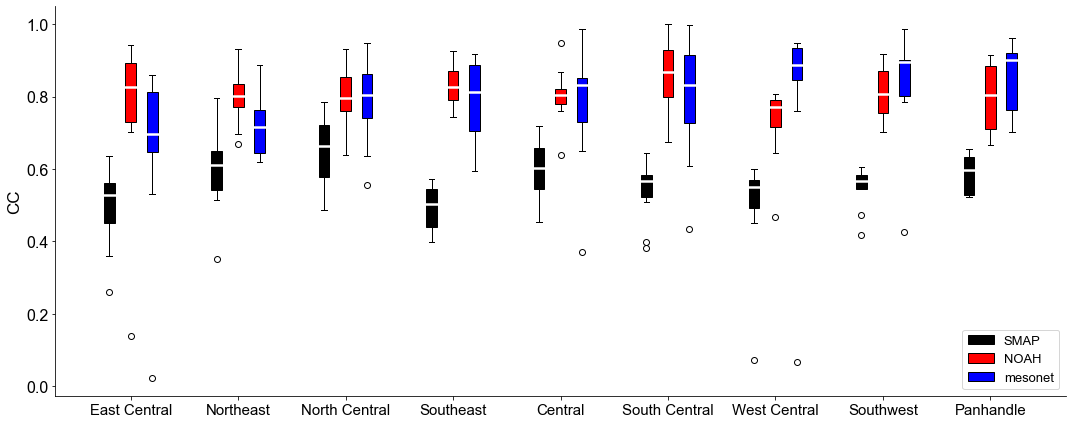

In [226]:
fig, ax= boxplot(cc_smap, cc_noah, cc_meso, names)

In [227]:
fig.savefig('climate_division_6PM.pdf')

In [99]:
def radarChart(names, variables,save=False, saveName=None):
    #create background
    N= len(names)
    angles = [n / float(N) * 2 * np.pi for n in range(N)]
    angles += angles[:1]
    fig= plt.figure(figsize=(10,10))
    ax = plt.subplot(111, polar=True)
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)
    plt.xticks(angles[:-1], names)
    ax.set_rlabel_position(0)
    plt.yticks(np.arange(0,1,0.2), ['%.1f'%i for i in np.arange(0,1,0.2)], color="grey", size=12)
    plt.ylim(0,1)
    colors= ['blue', 'black', 'red']
    #add plots
    n_variables= len(variables)
    labels= ['mesonet', 'SMAP', 'NOAH']
    for n in range(n_variables):
        values= variables[n]
        values= [v.median() for v in values]
        values += values[:1]
        ax.plot(angles, values, linewidth=1, c=colors[n], linestyle='solid', label=labels[n])
        ax.fill(angles, values, colors[n], alpha=0.1,)
    plt.legend()
    if save:
        plt.savefig(saveName)
    
    return fig,ax



In [12]:
sortNames= ['North Central', 'Northeast', 'East Central', 'Southeast', 'South Central', 'Southwest',
           'West Central', 'Pnhandle']
inames= np.array([2,3,1,6,5,7,8,4])

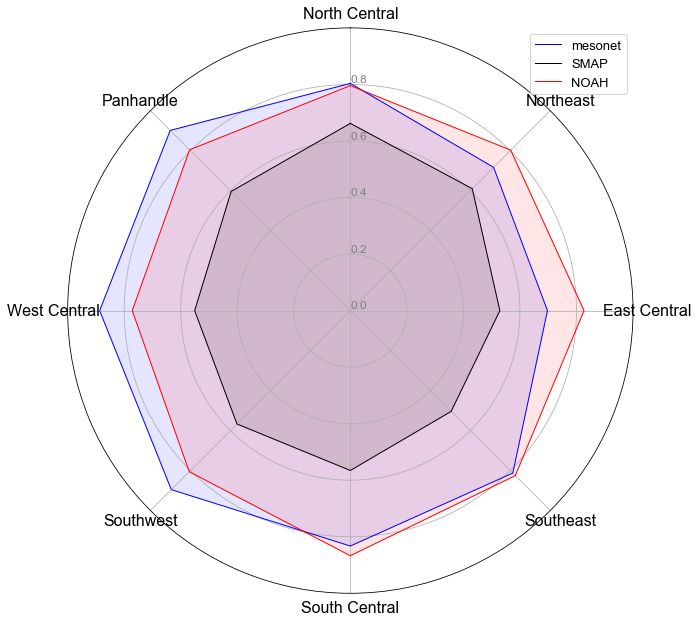

In [123]:
radarChart(np.array(names)[inames],
                    [np.array(cc_meso)[inames],np.array(cc_smap)[inames],np.array(cc_noah)[inames]],
          save=True);

# 6AM

In [228]:
climate= pd.read_excel('TC_CLIMATEDIVISION_6AM.xlsx')

In [229]:
climate.rename(columns= {'Unnamed: 0': 'cdiv'}, inplace=True)

In [230]:
cdiv= list(climate.groupby('cdiv'))
names= [c[0] for c in cdiv]
cc_smap= [c[1].cc_smap for c in cdiv]
cc_noah= [c[1].cc_noah for c in cdiv]
cc_meso= [c[1].cc_mesonet for c in cdiv]

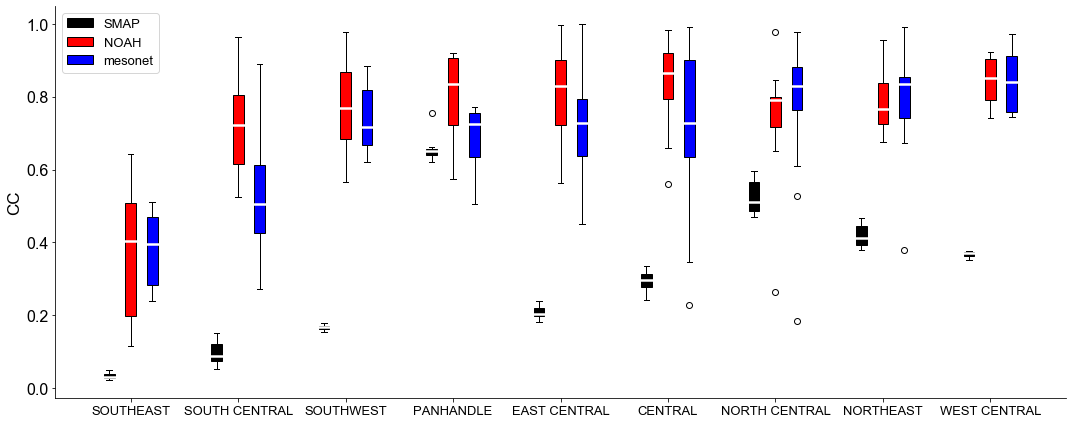

In [231]:
fig, ax= boxplot(cc_smap, cc_noah, cc_meso, names, fontsize=13)

In [232]:
fig.savefig('climate_division_6AM.pdf')

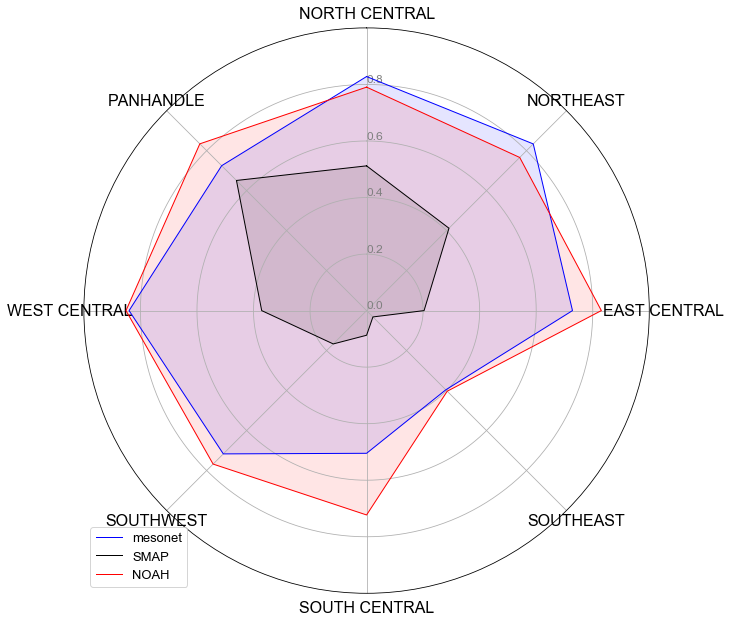

In [139]:
radarChart(np.array(names)[inames],
                    [np.array(cc_meso)[inames],np.array(cc_smap)[inames],np.array(cc_noah)[inames]],
          save=True, saveName='climate_division_6AM_radar.pdf');

# Daily

In [233]:
climate= pd.read_excel('TC_CLIMATEDIVISION_daily_final.xlsx')

In [234]:
climate.rename(columns= {'NLCD_landcover': 'cdiv'}, inplace=True)

In [235]:
cdiv= list(climate.groupby('cdiv'))
names= [c[0] for c in cdiv]
cc_smap= [c[1].cc_smap for c in cdiv]
cc_noah= [c[1].cc_noah for c in cdiv]
cc_meso= [c[1].cc_mesonet for c in cdiv]

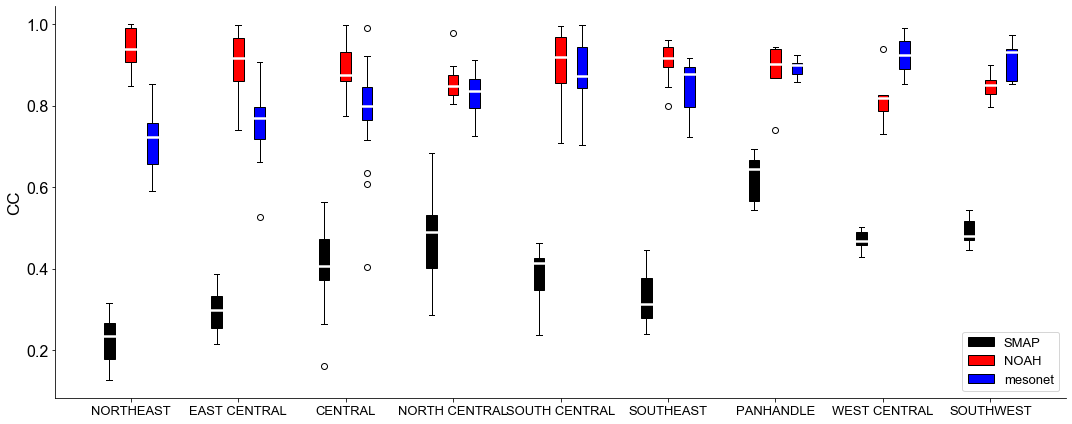

In [236]:
fig, ax= boxplot(cc_smap, cc_noah, cc_meso, names, fontsize=13)

In [237]:
fig.savefig('climate_division_daily.pdf')

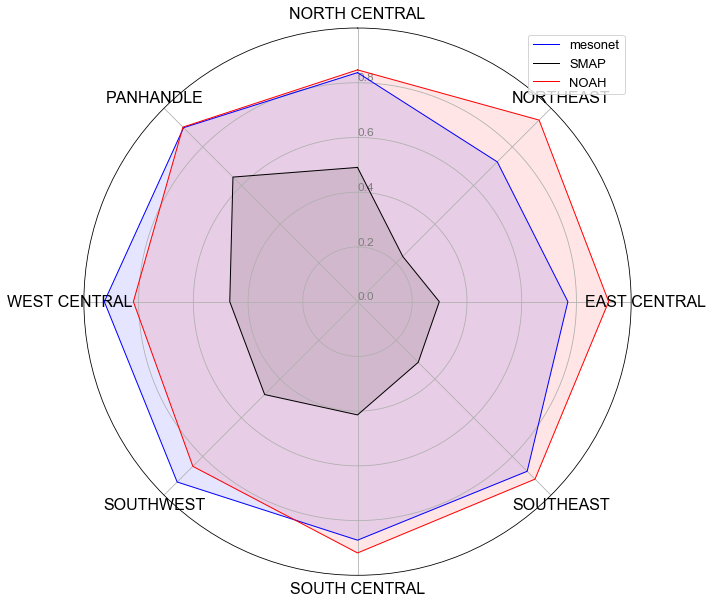

In [25]:
fig, ax= radarChart(np.array(names)[inames],
                    [np.array(cc_meso)[inames],np.array(cc_smap)[inames],np.array(cc_noah)[inames]])

In [26]:
fig.savefig('climate_division_daily_radar.pdf')

# Land cover

In [238]:
landcover_AM= pd.read_excel('TC_landcover_6AM.xlsx')

In [239]:
landcover_AM.rename(columns= {'Unnamed: 0': 'land'}, inplace=True)

In [240]:
land= list(landcover_AM.groupby('land'))
names= [c[0] for c in land]
cc_smap= [c[1].cc_smap for c in land]
cc_noah= [c[1].cc_noah for c in land]
cc_meso= [c[1].cc_mesonet for c in land]

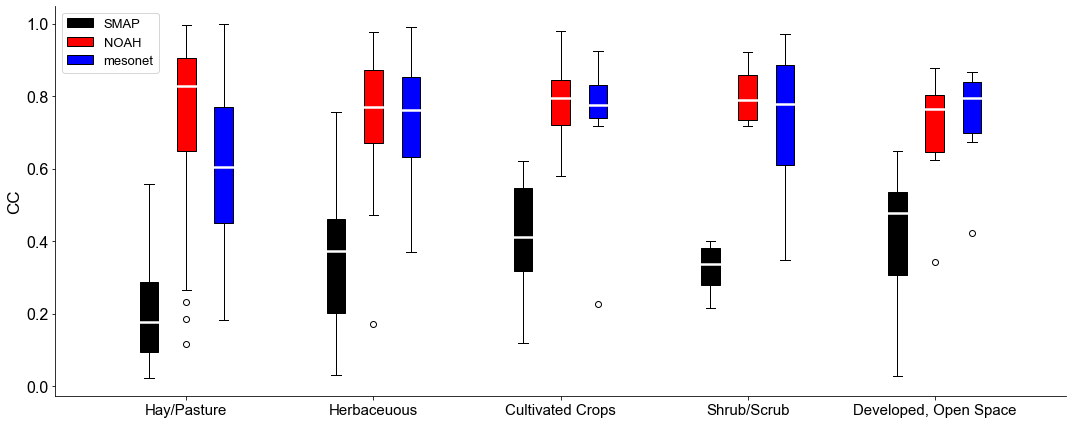

In [241]:
fig, ax= boxplot(cc_smap, cc_noah, cc_meso, names, fontsize=15)

In [242]:
fig.savefig('landcover_AM.pdf')

In [243]:
landcover_PM= pd.read_excel('TC_landcover_6PM.xlsx', sheet_name='Sheet2')

In [244]:
landcover_PM.rename(columns= {'Unnamed: 0': 'land'}, inplace=True)

In [245]:
land= list(landcover_PM.groupby('land'))
names= [c[0] for c in land]
cc_smap= [c[1].cc_smap for c in land]
cc_noah= [c[1].cc_noah for c in land]
cc_meso= [c[1].cc_mesonet for c in land]

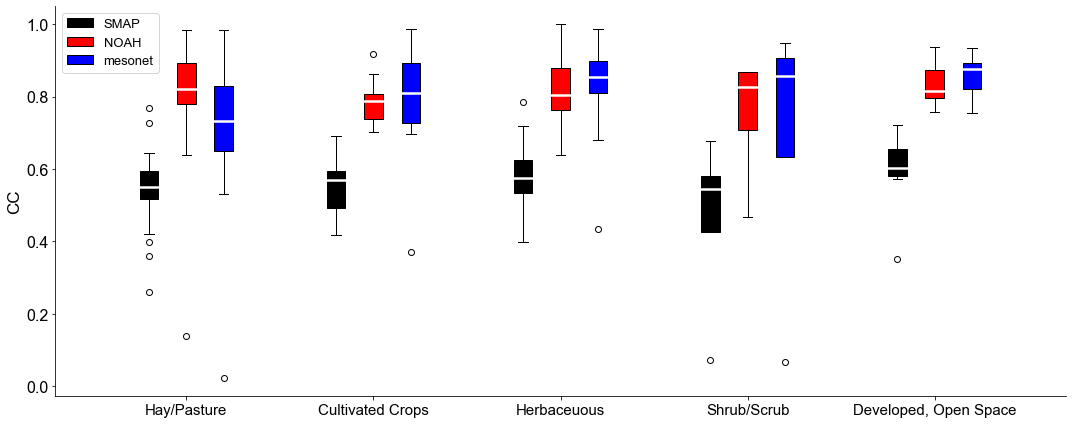

In [246]:
fig, ax= boxplot(cc_smap, cc_noah, cc_meso, names, fontsize=15)

In [247]:
fig.savefig('landcover_PM.pdf')

# Landcover daily

In [248]:
landcover_daily= pd.read_excel('TC_landcover_daily.xlsx')
landcover_daily.rename(columns= {'Unnamed: 0': 'land'}, inplace=True)

In [249]:
land= list(landcover_daily.groupby('land'))
names= [c[0] for c in land]
cc_smap= [c[1].cc_smap for c in land]
cc_noah= [c[1].cc_noah for c in land]
cc_meso= [c[1].cc_mesonet for c in land]

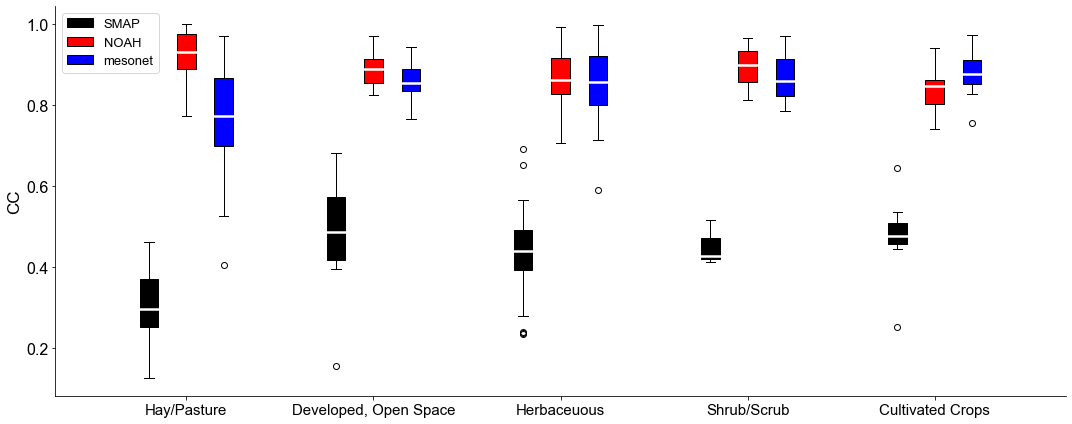

In [250]:
fig, ax= boxplot(cc_smap, cc_noah, cc_meso, names, fontsize=15)

In [251]:
fig.savefig('landcover_daily.pdf')

# Soil type

In [155]:
soil_type_AM= pd.read_excel('TC_soiltype_6AM_final.xlsx')

In [156]:
soil_type_AM.rename(columns= {'Soil_type_5cmdepth': 'soil'}, inplace=True)

In [157]:
soil= list(soil_type_AM.groupby('soil'))
names= [c[0] for c in soil]
cc_smap_AM= [c[1].cc_smap for c in soil]
cc_noah_AM= [c[1].cc_noah for c in soil]
cc_meso_AM= [c[1].cc_mesonet for c in soil]

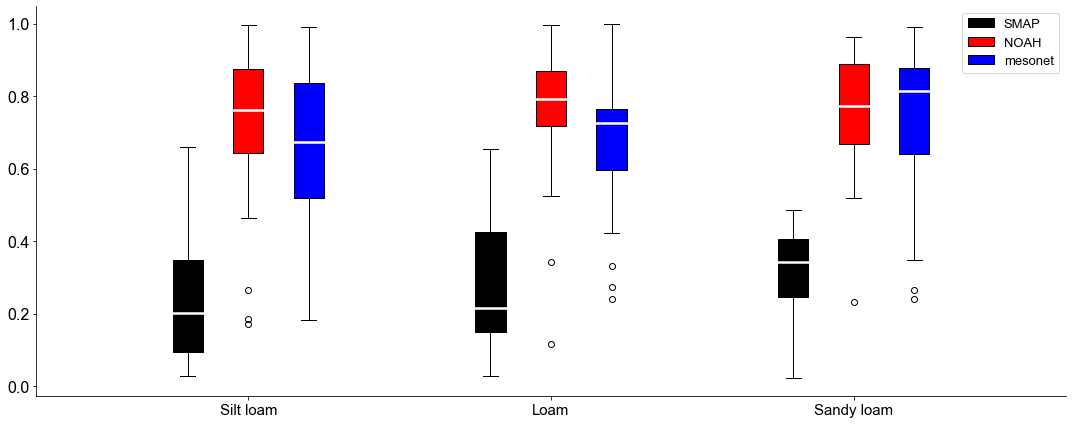

In [147]:
fig, ax= boxplot(cc_smap, cc_noah, cc_meso, names, fontsize=15)

In [148]:
fig.savefig('soiltype_6AM.pdf')

In [158]:
soil_type_PM= pd.read_excel('TC_soiltype_6PM.xlsx')
soil_type_PM.rename(columns= {'TEXT5': 'soil'}, inplace=True)
soil= list(soil_type_PM.groupby('soil'))
names_= [c[0] for c in soil]
cc_smap_PM= [c[1].cc_smap for c in soil]
cc_noah_PM= [c[1].cc_noah for c in soil]
cc_meso_PM= [c[1].cc_mesonet for c in soil]

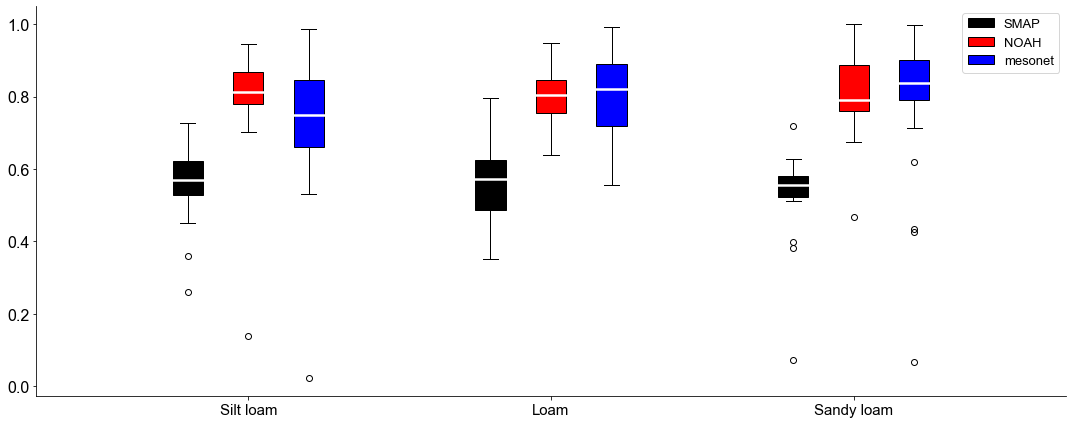

In [150]:
fig, ax= boxplot(cc_smap, cc_noah, cc_meso, names, fontsize=15)

In [151]:
fig.savefig('soiltype_6PM.pdf')

In [159]:
soil_type_PM= pd.read_excel('TC_soiltype_daily.xlsx')
soil_type_PM.rename(columns= {'TEXT5': 'soil'}, inplace=True)
soil= list(soil_type_PM.groupby('soil'))
names= [c[0] for c in soil]
cc_smap_D= [c[1].cc_smap for c in soil]
cc_noah_D= [c[1].cc_noah for c in soil]
cc_meso_D= [c[1].cc_mesonet for c in soil]

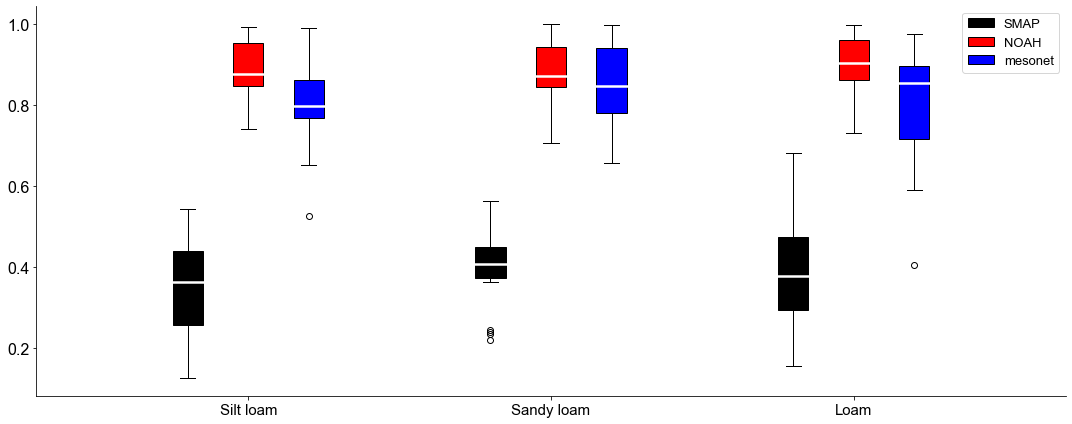

In [153]:
fig, ax= boxplot(cc_smap, cc_noah, cc_meso, names, fontsize=15)

In [154]:
fig.savefig('soiltype_daily.pdf')

In [172]:
cc_smap= [[cc_smap_D[i]]+[cc_smap_AM[i]]+[cc_smap_PM[i]] for i in range(len(names))]
cc_noah= [[cc_noah_D[i]]+[cc_noah_AM[i]]+[cc_noah_PM[i]] for i in range(len(names))]
cc_meso= [[cc_meso_D[i]]+[cc_meso_AM[i]]+[cc_meso_PM[i]] for i in range(len(names))]

In [177]:
cc_smap= cc_smap[0]+cc_smap[1]+cc_smap[2]
cc_noah= cc_noah[0]+cc_noah[1]+cc_noah[2]
cc_meso= cc_meso[0]+cc_meso[1]+cc_meso[2]

Text(0, 0.5, 'CC')

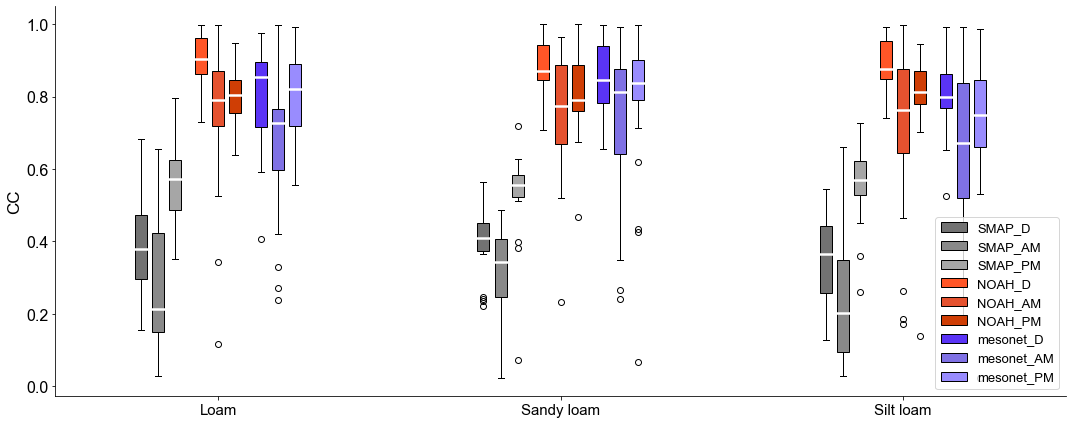

In [221]:
positions_smap_l= np.arange(0.9, 5.9, 2)
positions_smap_c= np.arange(1,   6 ,  2)
positions_smap_r= np.arange(1.1, 6.1, 2)

positions_noah_l= np.arange(1.25, 6.2, 2)
positions_noah_c= np.arange(1.35, 6.3, 2)
positions_noah_r= np.arange(1.45, 6.4, 2)

positions_meso_l= np.arange(1.6, 6.5, 2)
positions_meso_c= np.arange(1.7, 6.6, 2)
positions_meso_r= np.arange(1.8, 6.7, 2)

fig, ax= plt.subplots(figsize=(15,6))
b1= ax.boxplot(cc_smap_D, positions= positions_smap_l, widths=.07,patch_artist=True,
            boxprops=dict(facecolor="#727272"),medianprops = dict(linewidth=2.5, color='white'));
b2= ax.boxplot(cc_smap_AM, positions= positions_smap_c, widths=.07,patch_artist=True,
           boxprops=dict(facecolor="#898989"),medianprops = dict(linewidth=2.5, color='white'));
b3= ax.boxplot(cc_smap_PM, positions= positions_smap_r, widths=.07,patch_artist=True,
           boxprops=dict(facecolor="#A6A6A6"),medianprops = dict(linewidth=2.5, color='white'));

b4= ax.boxplot(cc_noah_D, positions= positions_noah_l, widths=.07,patch_artist=True,
           boxprops=dict(facecolor="#FF5627"),medianprops = dict(linewidth=2.5, color='white'));
b5= ax.boxplot(cc_noah_AM, positions= positions_noah_c, widths=.07,patch_artist=True,
           boxprops=dict(facecolor="#E5522F"),medianprops = dict(linewidth=2.5, color='white'));
b6= ax.boxplot(cc_noah_PM, positions= positions_noah_r, widths=.07,patch_artist=True,
           boxprops=dict(facecolor="#CF3E05"),medianprops = dict(linewidth=2.5, color='white'));

b7= ax.boxplot(cc_meso_D, positions= positions_meso_l, widths=.07,patch_artist=True,
           boxprops=dict(facecolor="#5A34F6"),medianprops = dict(linewidth=2.5, color='white'));
b8= ax.boxplot(cc_meso_AM, positions= positions_meso_c, widths=.07,patch_artist=True,
           boxprops=dict(facecolor="#7F71E4"),medianprops = dict(linewidth=2.5, color='white'));
b9= ax.boxplot(cc_meso_PM, positions= positions_meso_r, widths=.07,patch_artist=True,
           boxprops=dict(facecolor="#998CFE"),medianprops = dict(linewidth=2.5, color='white'));

ax.set_xticks([1.35,3.35,5.35])
ax.set_xticklabels(names, fontsize=15)
ax.legend([b1["boxes"][0], b2['boxes'][1], b3['boxes'][0],
          b4["boxes"][0], b5['boxes'][1], b6['boxes'][0],
          b7["boxes"][0], b8['boxes'][1], b9['boxes'][0],],
          ['SMAP_D', 'SMAP_AM', 'SMAP_PM', 
           'NOAH_D', 'NOAH_AM', 'NOAH_PM', 
           'mesonet_D', 'mesonet_AM', 'mesonet_PM'])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_ylabel('CC')

In [222]:
fig.savefig('soiltype.pdf')

# Spatial performance

In [2]:
rmse= np.load('RMSE_raster_PM.npy')
cc= np.load('CC_raster_PM.npy')
lons= np.arange(-103, -103+69*0.125, 0.125)
lats= np.arange(37, 37+27*(-0.125), -0.125)
#read gauges
sites= gp.read_file('sites.shp')
geoInfo= [np.array(sites.iloc[i,:].geometry) for i in range(len(sites))]

In [4]:
def plot(data, lons, lats, plotsites=False, **kwargs):
    # Plotting 2070 projected August (8) precip from worldclim
    global geoInfo
    xmin= lons[0]
    ymin= lats[0]
    xmax= lons[-1]
    ymax= lats[-1]
    xres = lons[1]- lons[0]
    yres = lats[1]- lats[0]
    data[(data<0)]= np.nan
    avg= np.nanmean(data)
    mx= np.nanmax(data)
    mn= np.nanmin(data)

    # A good LCC projection for USA plots
    m = Basemap(llcrnrlon=-103,llcrnrlat=33.5,urcrnrlon=-94.5,urcrnrlat=37,
                projection='cyl')

    
#     m.drawcoastlines(linewidth=0.5)
    m.drawparallels(np.arange(33, 37, 1), labels=[True,False,True,False],  linewidth=.2)
    m.drawmeridians(np.arange(-103, -94, 2), labels=[True,False,True,False], linewidth=.2)
#     m.drawmapboundary(fill_color='white', linewidth=0)

    x,y = np.mgrid[xmin:xmax+xres:xres, ymax:ymin-yres:-yres]
    x,y = m(x,y)
    data= np.flip(data, axis=0)
    cmap= kwargs.get('cmap', None)
    if cmap is None:
        cmap = plt.get_cmap('jet')
#         cmap.set_under ('1.0')
        cmap.set_bad('1')

    map = m.pcolormesh(x,y, data.T, cmap=cmap, **kwargs)
    sites= m.readshapefile('sites','site')
    if plotsites:
        for each in geoInfo:
            m.plot(each[0], each[1], marker='o', color='k')

    cb = plt.colorbar( orientation='vertical', fraction=0.10, shrink=0.7)

    return map, data, avg

In [ ]:
fig= plt.figure()
ax= fig.add_subplot(321)
m, data, avg= plot(cc[0], lons, lats, vmin=0, vmax=1)
ax.set_xlabel('mean: %.2f'%(avg), fontsize=15)
ax= fig.add_subplot(322)
ax.hist(data.reshape(-1), bins=50, color='k')

ax= fig.add_subplot(323)
m, data,avg= plot(cc[1], lons, lats, vmin=0, vmax=1)
ax.set_xlabel('mean: %.2f'%(avg), fontsize=15)
ax= fig.add_subplot(324)
ax.hist(data.reshape(-1), bins=50, color='k')
ax= fig.add_subplot(325)
m, data,avg= plot(cc[2], lons, lats, True, vmin=0, vmax=1)
ax.set_xlabel('mean: %.2f'%(avg), fontsize=15)
ax= fig.add_subplot(326)
ax.hist(data.reshape(-1), bins=50, color='k');

In [3]:
from osgeo import gdal
def arr2raster(dst, arr):
    rows, cols= arr.shape
    geotransform= (-103, 0.125 , 0, 37, 0, -0.125)
    driver= gdal.GetDriverByName('GTiff')
    outdata= driver.Create(dst, cols, rows, 1, gdal.GDT_Float32)
    outdata.SetGeoTransform(geotransform)
    outdata.SetProjection('EPSG:4326')
    outdata.GetRasterBand(1).WriteArray(arr)

In [4]:
arr2raster('mesonet_cc_PM.tif', cc[2])
arr2raster('noah_cc_PM.tif', cc[1])
arr2raster('smap_cc_PM.tif', cc[0])

1. Left coner, kriging has higher interpolation uncertainties that TC can capture this feature.
2. The performance of mesonet is highly dependent on the density of gauges;